# Преобразование Фурье

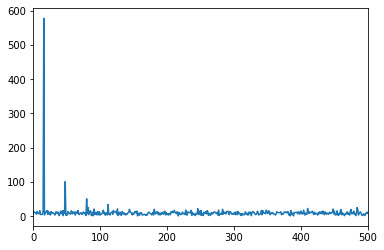

In [2]:
from numpy import zeros,loadtxt
from pylab import plot,xlim,show
from cmath import exp,pi

def dft(y):
    N = len(y)
    c = zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

y = loadtxt("data/pitch.txt",float)
c = dft(y)
plot(abs(c))
xlim(0,500)
show()

In [ ]:
######################################################################
#
# Functions to perform fast discrete cosine and sine transforms and
# their inverses in one and two dimensions.  These functions work by
# wrapping the DFT function from numpy, rather than explicitly
# performing the cosine and sine transforms themselves.  The sine
# transforms take arrays whose first element is zero and return arrays
# whose first element is also zero.  This differs from some other
# implementations, which drop the first element, since it is always
# zero.
#
#   dct(y): Type-II discrete cosine transform (DCT) of real data y
#   idct(a): Type-II inverse DCT of a
#   dct2(y): 2D DCT of 2D real array y
#   idct2(a): 2D inverse DCT real array a
#   dst(y): Type-I discrete sine transform (DST) of real data y
#   idst(a): Type-I inverse DST of a
#   dst2(y): 2D DST of 2D real array y
#   idst2(a): 2D inverse DST real array a
#
# Written by Mark Newman <mejn@umich.edu>, June 24, 2011
# You may use, share, or modify this file freely
#
######################################################################


from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft


######################################################################
# 1D DCT Type-II

def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])


######################################################################
# 1D inverse DCT Type-II

def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]


######################################################################
# 2D DCT

def dct2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dct(y[i,:])
    for j in range(N):
        b[:,j] = dct(a[:,j])

    return b


######################################################################
# 2D inverse DCT

def idct2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idct(b[i,:])
    for j in range(N):
        y[:,j] = idct(a[:,j])

    return y


######################################################################
# 1D DST Type-I

def dst(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a


######################################################################
# 1D inverse DST Type-I

def idst(a):
    N = len(a)
    c = empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0

    return y


######################################################################
# 2D DST

def dst2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dst(y[i,:])
    for j in range(N):
        b[:,j] = dst(a[:,j])

    return b


######################################################################
# 2D inverse DST

def idst2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idst(b[i,:])
    for j in range(N):
        y[:,j] = idst(a[:,j])

    return y